# **Laboratorio de SIS420**
**Nombre:** Rúa Echalar Juan Manuel **Carrera:** Ingeniería en Ciencias de la Computación
## Regresión lineal múltiple

In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/datasets/honey_price.csv', delimiter=',')
X = data[:, :9]
y = data[:, 9]
m = y.size
print(m)
# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

11001
  X[:,0] X[:, 1]         y
--------------------------
       3       2       645
       2       2       178
       3       2       631
       6       2       587
       3       1       639
       8       1       211
       7       1       626
       5       2       200
       9       2       286
       9       2       441


In [4]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [5]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[2.81000e+00 1.75000e+00 2.30400e+01 ... 3.36300e+01 4.84450e+03
  6.80000e-01]
 [2.25000e+00 1.65000e+00 2.06700e+01 ... 2.55700e+01 4.22818e+03
  8.40000e-01]
 [3.35000e+00 1.76000e+00 1.20400e+01 ... 2.99700e+01 9.41585e+03
  6.80000e-01]
 ...
 [8.70000e+00 1.65000e+00 1.66000e+01 ... 2.24700e+01 7.84813e+03
  6.40000e-01]
 [3.40000e+00 1.40000e+00 1.50700e+01 ... 4.35000e+01 6.43998e+03
  1.00000e+00]
 [9.18000e+00 1.42000e+00 1.26000e+01 ... 4.30400e+01 3.92584e+03
  1.00000e+00]]
Media calculada: [5.49868467e+00 1.53673848e+00 1.85075766e+01 5.01261431e+00
 7.99065539e-01 3.49196964e+01 3.24350577e+01 5.69440165e+03
 8.23248796e-01]
Desviación estandar calculada: [2.59341402e+00 1.87914745e-01 3.76292929e+00 1.44058620e+00
 5.78397852e-02 8.62232280e+00 7.18697518e+00 2.46155172e+03
 1.39211843e-01]
[[-1.03673561  1.13488445  1.20449338 ...  0.16626498 -0.34527069
  -1.02899863]
 [-1.25266719  0.60272823  0.57466491 ... -0.95520821 -0.59564934
   0.12032888]
 [-0.82851587  1.188

In [6]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [7]:
print(X)

[[ 1.         -1.03673561  1.13488445 ...  0.16626498 -0.34527069
  -1.02899863]
 [ 1.         -1.25266719  0.60272823 ... -0.95520821 -0.59564934
   0.12032888]
 [ 1.         -0.82851587  1.18810007 ... -0.3429896   1.51183025
  -1.02899863]
 ...
 [ 1.          1.23440195  0.60272823 ... -1.38654406  0.87494743
  -1.31633051]
 [ 1.         -0.80923626 -0.72766232 ...  1.53958265  0.30288957
   1.26965638]
 [ 1.          1.41948617 -0.62123107 ...  1.47557797 -0.7184743
   1.26965638]]


# Descenso por el gradiente

In [8]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 5.91155817e+02 -5.34276787e-01 -2.15921541e+00  2.68309817e+00
 -2.62136199e+00 -2.95779098e+00 -1.35342145e+00 -2.88032693e+00
  2.58599866e+00  1.01631123e+02]
El precio predecido para la miel (usando el descenso por el gradiente) es: $733


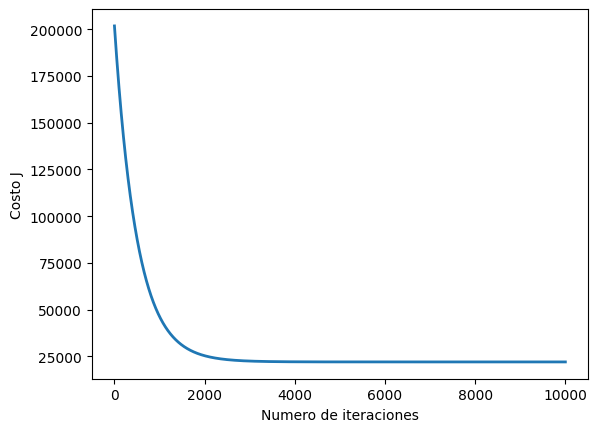

In [10]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(10)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,8.88,1.36,23.26,4.37,0.75,41.65,30.1,9901.18,1.0]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para la miel (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

In [11]:
# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1,6.68,1.38,12.6,5.94,0.72,47.95,26.4,4908.49,1.0]
X_array[1:10] = (X_array[1:10] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para la miel (usando el descenso por el gradiente) es: ${:.0f}'.format(price))

El precio predecido para la miel (usando el descenso por el gradiente) es: $719


In [12]:
X_array = [1,6.68,1.38,12.6,5.94,0.72,47.95,26.4,4908.49,1.05]
X_array[1:10] = (X_array[1:10] - mu) / sigma

In [13]:
X_array[1:10]

[0.4555058798389004,
 -0.8340935589998361,
 -1.569940897263626,
 0.6437557805792374,
 -1.366974984209795,
 1.5112289241606545,
 -0.8397215202805174,
 -0.31927489036702,
 1.6288212289523911]

# **Ecuación de la Normal**

In [14]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/datasets/honey_price.csv', delimiter=',')
X = data[:, :9]
y = data[:, 9]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [15]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [16]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1,4.34,1.24,15.84,6.2,0.82,25.45,20.06,9411.69,0.64]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 5.77805158e+01 -2.10161835e-01 -1.14110100e+01  7.14047222e-01
 -1.79774477e+00 -5.10907301e+01 -1.57183137e-01 -4.01026256e-01
  1.05070116e-03  7.30310574e+02]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $466


# **Regresión polinomial**

In [17]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [19]:
# Cargar datos
#data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
#from numpy import genfromtxt
#data = genfromtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=';')
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/datasets/honey_price.csv', delimiter=",",skiprows=1)
#print(data)
X = data[:, :9]
y = data[:, 9]
m = y.size
#print(X)
#print(y)
# imprimir algunos puntos de datos
#print('{:>8s}{:>10s}'.format(X, y))
#print('-'*26)
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

       2       178
       3       631
       6       587
       3       639
       8       211
       7       626
       5       200
       9       286
       9       441
       2       346
       2       615
       7       926
       8       620
       9       794
       7       977
       8       287
      10       615
       6       967
       6       604
       3       583


In [20]:
print(X.shape)

(11000, 9)


In [21]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')

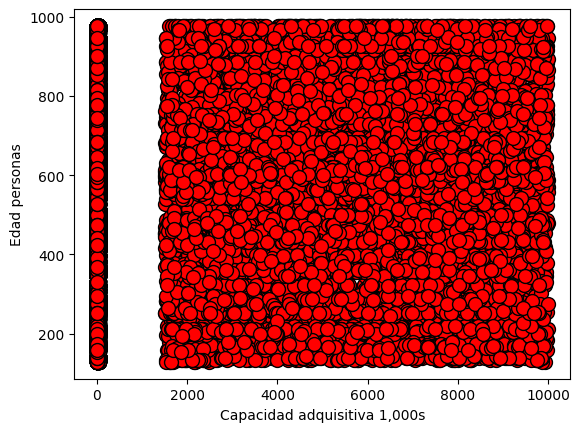

In [22]:
plotData(X, y)

In [23]:
X = np.concatenate([X, X * X], axis=1)

In [24]:
print(X.shape)

(11000, 18)


In [25]:
print(X)

[[2.25000000e+00 1.65000000e+00 2.06700000e+01 ... 6.53824900e+02
  1.78775061e+07 7.05600000e-01]
 [3.35000000e+00 1.76000000e+00 1.20400000e+01 ... 8.98200900e+02
  8.86582312e+07 4.62400000e-01]
 [5.93000000e+00 1.85000000e+00 2.49300000e+01 ... 8.09971600e+02
  7.66346170e+07 9.40900000e-01]
 ...
 [8.70000000e+00 1.65000000e+00 1.66000000e+01 ... 5.04900900e+02
  6.15931445e+07 4.09600000e-01]
 [3.40000000e+00 1.40000000e+00 1.50700000e+01 ... 1.89225000e+03
  4.14733424e+07 1.00000000e+00]
 [9.18000000e+00 1.42000000e+00 1.26000000e+01 ... 1.85244160e+03
  1.54122197e+07 1.00000000e+00]]


In [26]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [27]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [28]:
print(mu.shape,sigma.shape)

(18,) (18,)


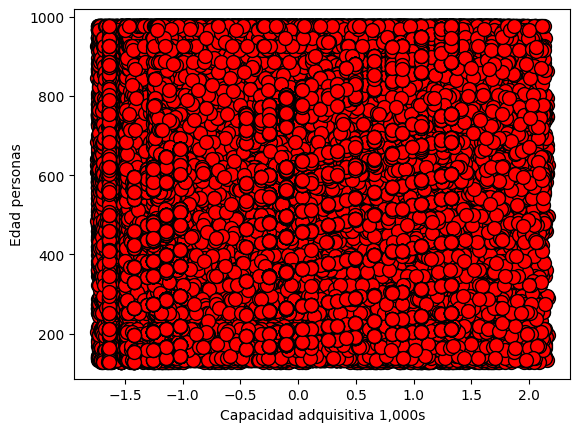

In [29]:
plotData(X_norm, y)

In [30]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [31]:
print(X.shape)

(11000, 19)


In [32]:
print(X)

[[ 1.         -1.25276571  0.6028393  ... -0.95852499 -0.71614471
   0.03702859]
 [ 1.         -0.82861294  1.1882188  ... -0.43782646  1.74338701
  -1.02741577]
 [ 1.          0.16621811  1.66716567 ... -0.62581901  1.32558314
   1.06689602]
 ...
 [ 1.          1.23431191  0.6028393  ... -1.27584137  0.8029129
  -1.25851224]
 [ 1.         -0.80933327 -0.72756867 ...  1.68022074  0.10377777
   1.32556651]
 [ 1.          1.41939676 -0.62113603 ...  1.59539991 -0.80180998
   1.32556651]]


# Descenso por el gradiente

In [33]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [34]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [35]:
def exercise(x_array):
    x_array = np.insert(x_array, 0, 1)
    x_array = np.append(x_array, x_array[1:]**2)
    return x_array

theta calculado por el descenso por el gradiente: [591.17760818   4.50349537   5.50029378  12.16526865  -9.93642723
  -1.39629214  -2.62787657   3.80089644   9.77375906  60.85008252
  -5.19787204  -7.75435611  -9.61233018   6.84518588  -1.57127329
   1.29828363  -6.71860466  -7.29127437  40.1313967 ]
La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): $564


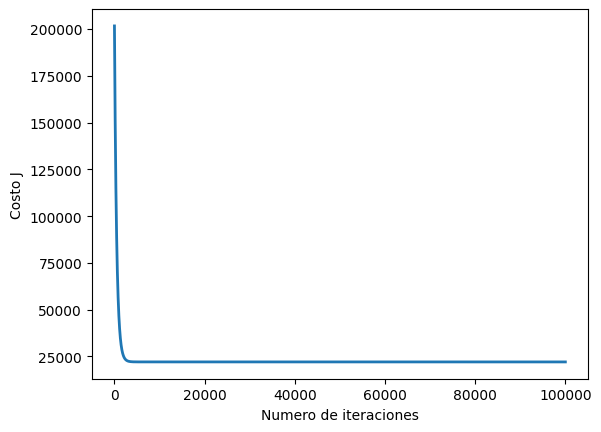

In [36]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# La capacidad adquisitiva de una persona de 33 años
X_array = [4.72,1.54,13.96,3.26,0.87,27.34,43.36,3958.71,0.8]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('La capacidad adquisitiva para una persona de 33 (usando el descenso por el gradiente): ${:.0f}'.format(price))

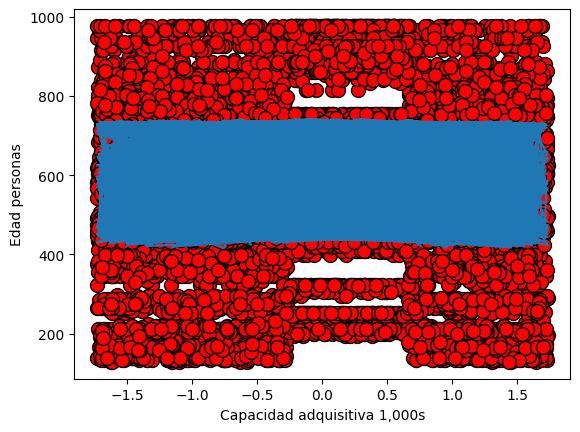

In [37]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [38]:
X_array = [6.66,1.42,23.06,3.53,0.86,30.46,32.99,6170.11,1.0]
X_array=exercise(X_array)
X_array[1:X_array.shape[0]] = (X_array[1:X_array.shape[0]] - mu) / sigma

In [39]:
X_array[1:X_array.shape[0]]
print(np.dot(X_array, theta))

729.9266866228633


# **Ecuación de la Normal**

In [40]:
# Cargar datos
data = np.loadtxt('/content/gdrive/MyDrive/IA/SIS420/datasets/honey_price.csv', delimiter=",",skiprows=1)
X = data[:, :9]
y = data[:, 9]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [41]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [42]:
def exercise(x_array):
    x_array = np.insert(x_array, 0, 1)
    x_array = np.append(x_array, x_array[1:]**2)
    return x_array

In [43]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [2.52,1.39,16.89,5.57,0.86,44.97,42.46,7100.34,1.0]
X_array= exercise(X_array)
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-3.00825192e+02  4.03642940e+00  2.50666527e+02  9.26194143e+00
 -1.30516928e+01 -4.02038024e+01 -6.61719987e-01  1.40863995e+00
  4.40605887e-03  9.17228992e+02 -3.79471053e-01 -8.55194126e+01
 -2.31669678e-01  1.12266969e+00 -7.31034379e+00  7.21679181e-03
 -2.79682043e-02 -2.91581293e-07 -1.19795357e+02]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $711


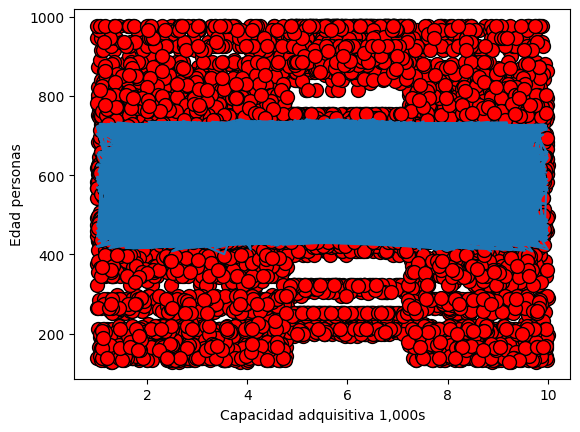

In [44]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')